## Taller de ML con DataBricks
**Pontificia Universidad Javeriana**<br />
**Hecho por: Juan Sebastián Clavijo Martínez**<br />
TEMA: Comparación de metricas de rendimiento entre diferentes modelos de clasificación<br />
Fecha: 09-10-2023<br />
Notas: 

**Clasificadores a usar**<br />
- clasificador random forest
- clasificador gradiente descendiente
- clasificador soporte vectorial

grid search - cv score<br />

Objetivo: Comparar los diferentes algoritmos de ML para la calidad del vino. La idea principal es jugar con clasificacion binaria 

In [142]:

#Parte 1: preprocesamiento de datos - importado de bibliotecas pertinentes
import pandas as pd #tratamiento de datos en un dataframe
import numpy as np #numerical python
import seaborn as sns #biblioteca versatil para estadistica y visualizacion
import matplotlib.pyplot as plt #biblioteca para vizualizacion de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder #standar sacler para normalizacion y encoder para codificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [105]:
#Parte 1.1: carga de datos
#se traen los datos del repositorio
url = 'https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/winequality-red.csv'
#se hace el obj dataframe
df_wines_01 = pd.read_csv(url,delimiter=";")
#vamos a presntar los primeros 5 renglones 
df_wines_01.head(10) #inspección visual

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [106]:
#Parte 1.2: presentacion general del df
df_wines_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observaciones**<br />
  - hay 1599 registros
  - indice del 0 al 1598
  - solo hay datos de tipo float64 o int64
  - hay 12 columnas, que contienen informacion sobre el vino como nivel de ph, acido cirtico, alcohol, y azucar residual entre otras
  - al pareceer no hay datos nulos

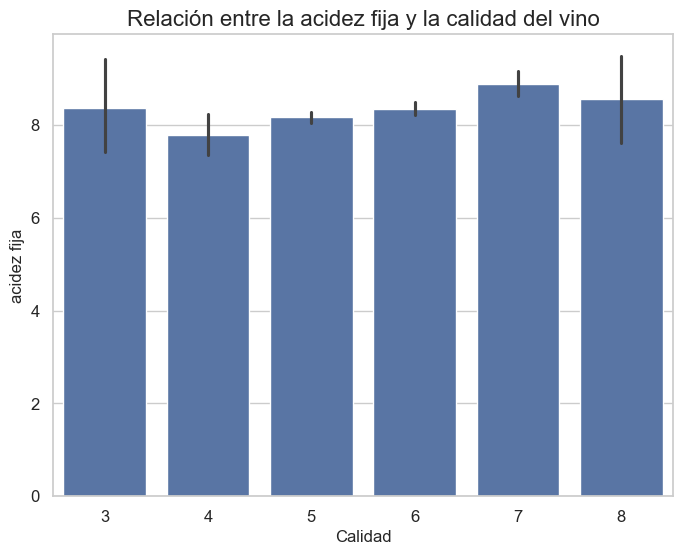

In [107]:
# Parte 1.3: gráficas
#   "una grafica dice más que mil palabras" -anónimo
#  se requiere graficar todas las caracteristicas vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='fixed acidity', data=df_wines_01)
plt.title("Relación entre la acidez fija y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("acidez fija", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

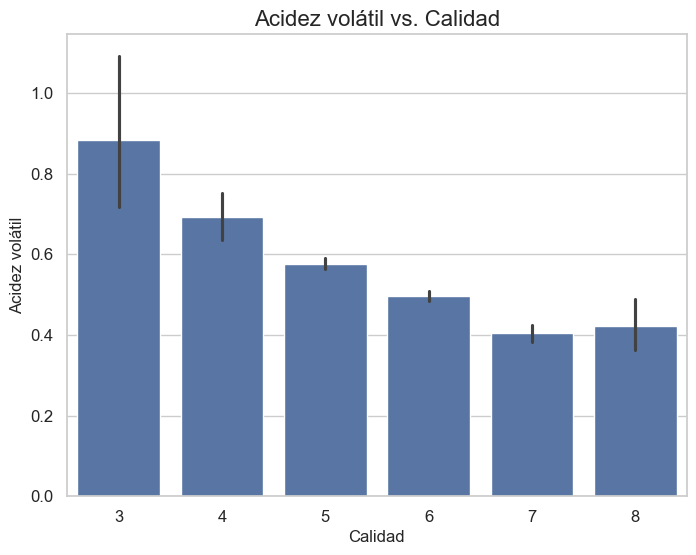

In [108]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='volatile acidity', data=df_wines_01)
plt.title("Acidez volátil vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Acidez volátil", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

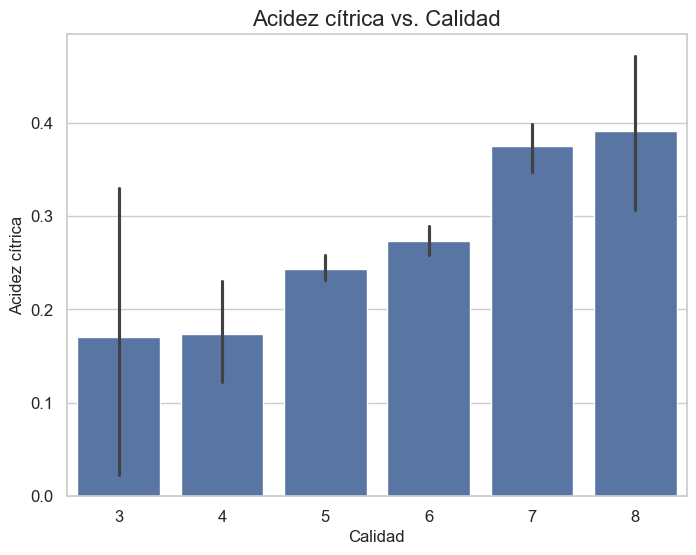

In [109]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='citric acid', data=df_wines_01)
plt.title("Acidez cítrica vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Acidez cítrica", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

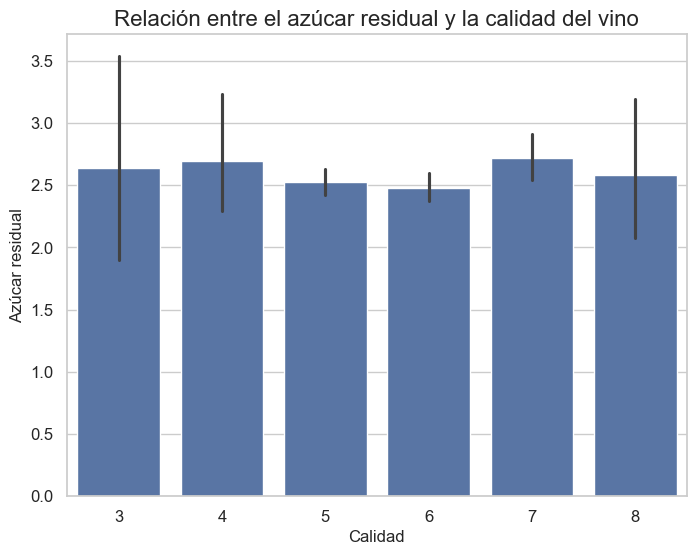

In [110]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='residual sugar', data=df_wines_01)
plt.title("Relación entre el azúcar residual y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Azúcar residual", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

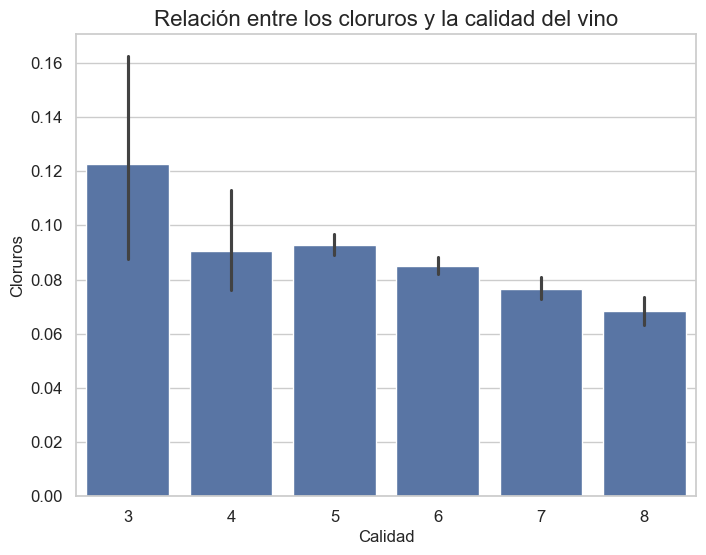

In [111]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='chlorides', data=df_wines_01)
plt.title("Relación entre los cloruros y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Cloruros", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

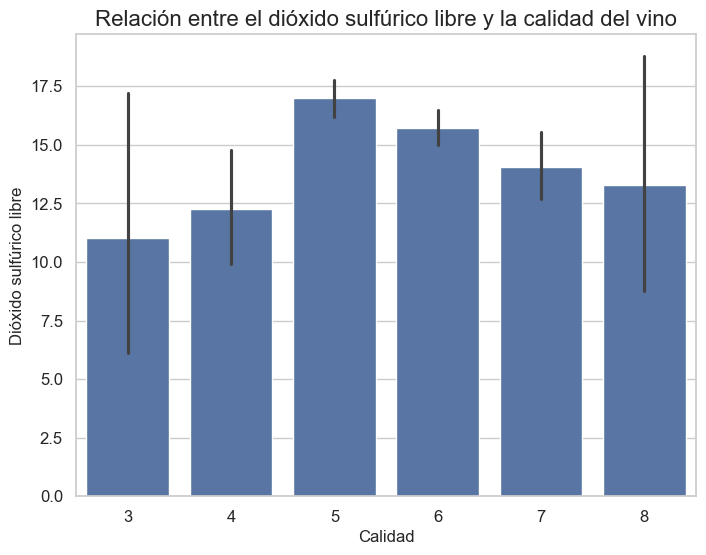

In [112]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df_wines_01)
plt.title("Relación entre el dióxido sulfúrico libre y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Dióxido sulfúrico libre", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

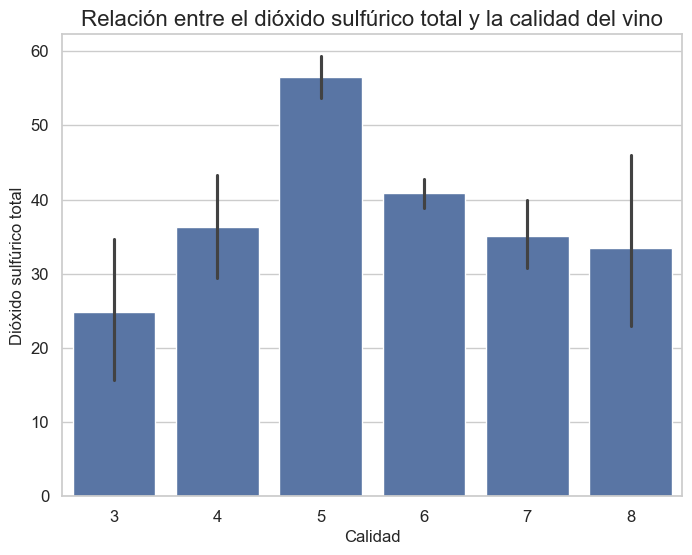

In [113]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df_wines_01)
plt.title("Relación entre el dióxido sulfúrico total y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Dióxido sulfúrico total", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

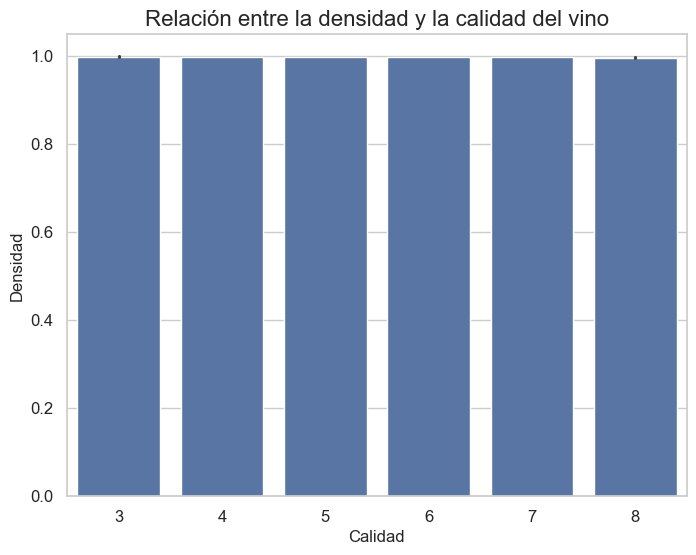

In [114]:
# Parte 1.3: gráficas
#   "una grafica dice más que mil palabras" -anónimo
# se requiere graficar todas las caracteristicas vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='density', data=df_wines_01)
plt.title("Relación entre la densidad y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

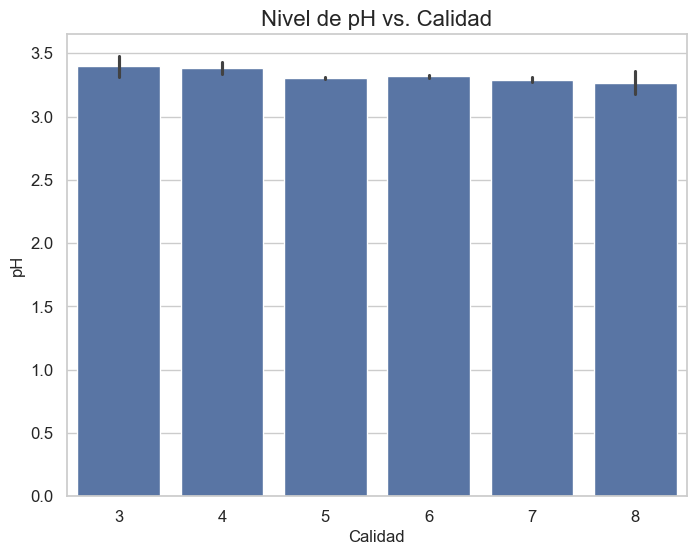

In [115]:
# Parte 1.3: gráficas
#   "Una gráfica dice más que mil palabras" - Anónimo
# Se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='pH', data=df_wines_01)
plt.title("Nivel de pH vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("pH", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

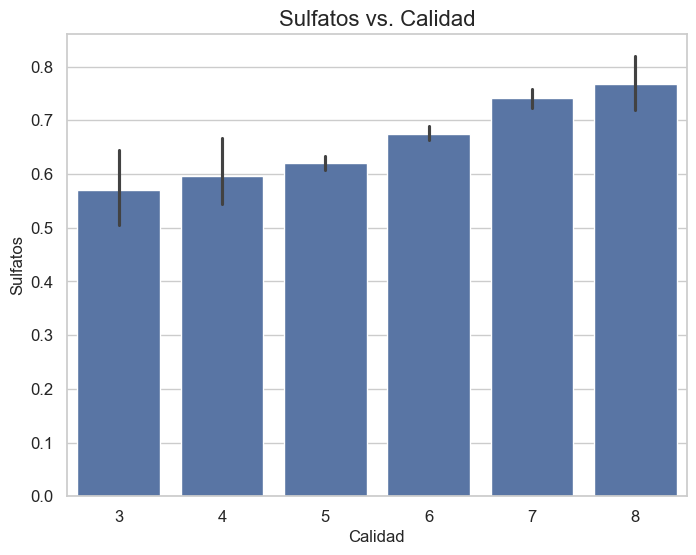

In [116]:
# Parte 1.3: gráficas
#   "Una gráfica dice más que mil palabras" - Anónimo
# Se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='sulphates', data=df_wines_01)
plt.title("Sulfatos vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Sulfatos", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

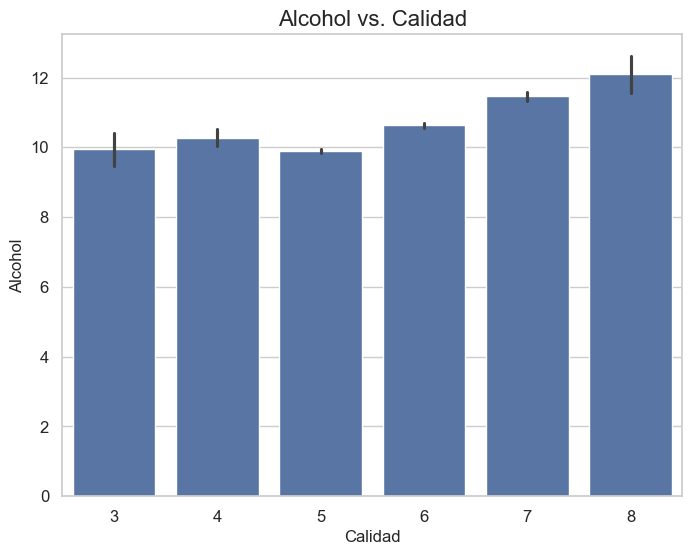

In [117]:
# Parte 1.3: gráficas
#   "Una gráfica dice más que mil palabras" - Anónimo
# Se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='alcohol', data=df_wines_01)
plt.title("Alcohol vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Alcohol", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [118]:
#Parte 1.4: limpieza
# Se presentan la sumatoria de datos nulos o duplicados
desaparecidos = len(df_wines_01)-len(df_wines_01.dropna())
Cantidad = len(df_wines_01)
print('Cantidad de datos NaN',desaparecidos)
print('Cantidad de datos duplicados', df_wines_01.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_wines_01.dropna(inplace=True)
#Se reinicia el indice por los elementos eliminados
df_wines_01.reset_index(drop = True, inplace = True)

Cantidad de datos NaN 0
Cantidad de datos duplicados 240


**Se toma la desicion de dejar los datos duplicados, con el proposito de hacer una comparación entre el rendimiento de los algoritmos**

In [119]:
#Parte 1.5: Se observan los valores de la colunma calidad 
df_wines_01['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [120]:
#Parte 2: codificación y preparación para los algoritmos de ML
#Para hacer la division en binario, se haran 2 categorías: Bueno y Malo. Estas dos clases se definirán entre 2 y 8 
clases = (2,6.5,8)
nombres = ['Malo','Bueno']
#Se sobreescribirá, bajo mi responsabilidad la columna target (quality)
df_wines_01['quality'] = pd.cut(df_wines_01['quality'],bins=clases,labels=nombres)

In [121]:
#Parte 2.1: Se crea un obj. del tipo codificaor de etiquetas (LabelEncoder)
codificador = LabelEncoder()

In [122]:
#Parte 2.2: Ajustamos y codificamos 0=malo, 1=bueno
df_wines_01['quality'] = codificador.fit_transform(df_wines_01['quality'])

In [123]:
#Parte 2.3: Hacemos cuenta de cuantos buenos y cuantos malos
df_wines_01['quality'].value_counts()

quality
1    1382
0     217
Name: count, dtype: int64

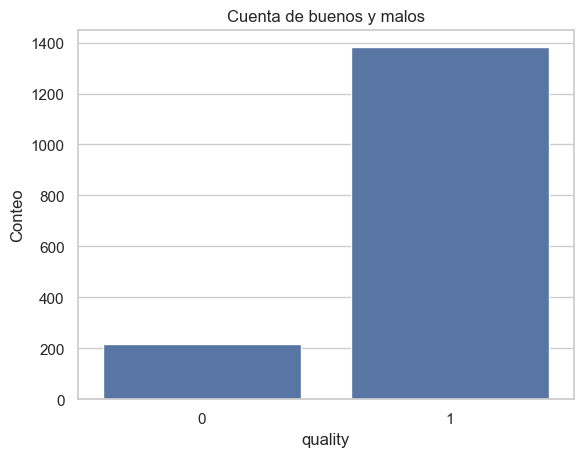

In [124]:
#Parte 2.4: Se grafic buenos y malos
sns.countplot(x=df_wines_01['quality'])
plt.title("Cuenta de buenos y malos")
plt.ylabel("Conteo", fontsize=12)
plt.show()

## Taller de ML con DataBricks
**Pontificia Universidad Javeriana**<br />
**Hecho por: Juan Sebastián Clavijo Martínez**<br />
TEMA: Comparación de metricas de rendimiento entre diferentes modelos de clasificación<br />
Fecha: 23-10-2023<br />
Notas:

In [125]:
#eliminamos duplicados e imprimimos suma
##cuenta de datos null, etc.
desaparecidos = len(df_wines_01)-len(df_wines_01.dropna())
Cantidad = len(df_wines_01)
print('Cantidad de obsev. con datos NaN',desaparecidos)
print('Cantidad de datos duplicados', df_wines_01.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_wines_01.dropna(inplace=True)
df_wines_01.drop_duplicates(inplace=True)
#Se reinicia el indice por los elementos eliminados
df_wines_01.reset_index(drop = True, inplace = True)
df_wines_01.info()

Cantidad de obsev. con datos NaN 0
Cantidad de datos duplicados 240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 122.2 KB


In [126]:
#se hace un resumen estadistico
df_wines_01.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


### OBSERVACIONES:
- acido citrico y calidad tienen ordenes de magnitud iguales similares
- el orden de magnitud de cloridos va desde 0.012 a 0.611
- el orden de magnitud de los dioxidos de sulfuro libres va de 1 a 72
**¿podría influir en los modelos las diferencias de ordenes de magnitud?**
R = si, los ordenes de magnitud si influyen en mis modelos porque me dicen que tanto hay de el objeto, no es lo mismo tener 5 mandarinas a 500.000.000 de hectareas de arboles cítricos

In [127]:
# Se seleccionan las columnas que se desean normalizar (las que están fuera del rango 0 a 1)
columnas_a_normalizar = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Aplica el escalado a las columnas seleccionadas
df_wines_01[columnas_a_normalizar] = scaler.fit_transform(df_wines_01[columnas_a_normalizar])


# El DataFrame ahora contiene las variables seleccionadas normalizadas.
df_wines_01.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,-6.274108e-16,1.000368,-2.137008,-0.697207,-0.236471,0.512226,4.370894
volatile acidity,1359.0,5.294776e-01,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1359.0,2.723326e-01,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual sugar,1359.0,-1.202537e-16,1.000368,-1.200903,-0.461157,-0.239233,0.056665,9.599383
chlorides,1359.0,4.182739e-17,1.000368,-1.542254,-0.367182,-0.184843,0.058275,10.593400
free sulfur dioxide,1359.0,-8.365477e-17,1.000368,-1.426094,-0.851570,-0.181291,0.488987,5.372442
total sulfur dioxide,1359.0,4.182739e-17,1.000368,-1.222457,-0.743367,-0.264277,0.484301,7.251446
density,1359.0,5.286982e-14,1.000368,-3.553604,-0.593582,-0.004789,0.594709,3.736721
pH,1359.0,-1.202537e-15,1.000368,-3.676535,-0.643871,0.001377,0.582100,4.518110
sulphates,1359.0,-5.542129e-16,1.000368,-1.926712,-0.637177,-0.226870,0.417898,7.862034


## Matriz de correlacion 

Representa la medida estadistica del grado de relacion entre 2 variables, por lo general se representa entre -1 y 1. -1 es inversamente proporcional. relacion 0 significa la influencia de dos cosas que nada que ver, cuando es cercano a 1 hay una relacion directa

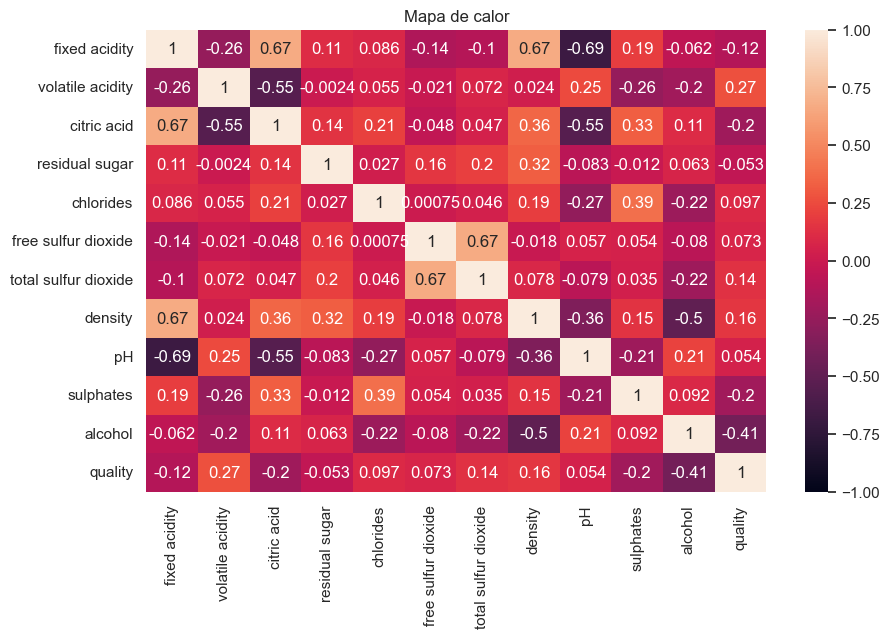

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(df_wines_01.corr(),vmin = -1, vmax=1,annot=True)
plt.title("Mapa de calor")
plt.show()

## 

## observaciones sobre variables no relacionadas a calidad
- se podría quitar: alcohol, residual sugar, fixed acidity

In [129]:
# se dividen en 2 grupos X representa las vars. ind. 
X = df_wines_01.drop(['quality'],axis=1)
# y representa las vars. dep.
y = df_wines_01['quality']
#se dividen el 80% de los datos para training y el resto para prueba
#La funcion retorna 4 grupos, de la linea de arriba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [130]:
#se crean los modelos a comparar, random forest, sdg y svm
# PRIMERO VA EL RANDOM FOREST
modelo02= RandomForestClassifier(n_estimators=200)
modelo02.fit(X_train,y_train)
modelo02.fit(X_train,y_train)
predict= modelo02.predict(X_test)
print(f"Reporte de metricas de rendimiento\n {classification_report(y_test,predict)}")

Reporte de metricas de rendimiento
               precision    recall  f1-score   support

           0       0.68      0.33      0.44        40
           1       0.89      0.97      0.93       232

    accuracy                           0.88       272
   macro avg       0.79      0.65      0.69       272
weighted avg       0.86      0.88      0.86       272



## OBSERVACIONES SOBRE EL REPORTE DE RANDOM FOREST
- La métrica "accuracy" (precisión global) del modelo es del 88%. Esto significa que el 88% de todas las predicciones realizadas por el modelo son correctas.
- El valor F1-score ponderado (weighted avg) es del 85%, lo que indica un equilibrio entre precisión y recall para todas las clases. El valor ponderado tiene en cuenta el desequilibrio en la distribución de las clases.
- La precisión para la clase 1 es alta, con un valor del 89%. Esto sugiere que el 89% de las predicciones realizadas para esta clase son correctas.

In [131]:
# se aplica el SGD
# Crear una instancia del modelo SGDClassifier
modelo_sgd = SGDClassifier()

# Entrenar el modelo con los datos de entrenamiento
modelo_sgd.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predicciones_sgd = modelo_sgd.predict(X_test)

# Imprimir el reporte de métricas de rendimiento
print("Reporte de métricas de rendimiento para el modelo SGD:")
print(classification_report(y_test, predicciones_sgd))


Reporte de métricas de rendimiento para el modelo SGD:
              precision    recall  f1-score   support

           0       0.50      0.17      0.26        40
           1       0.87      0.97      0.92       232

    accuracy                           0.85       272
   macro avg       0.69      0.57      0.59       272
weighted avg       0.82      0.85      0.82       272



## OBSERVACIONES SOBRE EL REPORTE DE SGD
- El recall (sensibilidad) para la clase 0 es del 7%, lo que indica que el modelo identificó correctamente solo el 7% de todas las instancias reales de esta clase. Esto sugiere que el modelo tiene dificultades para recuperar ejemplos de la clase 0.
- La precisión para la clase 1 es alta, con un valor del 85%. Esto sugiere que el 85% de las predicciones realizadas para esta clase son correctas
- El valor F1-score ponderado (weighted avg) es del 77%, lo que indica un equilibrio entre precisión y recall para todas las clases. El valor ponderado tiene en cuenta el desequilibrio en la distribución de las clases

In [132]:
#se aplica el SVM
# Crear una instancia del modelo SVC con un kernel lineal
modelo_svc = SVC(kernel='linear')

# Entrenar el modelo con los datos de entrenamiento
modelo_svc.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predicciones_svc = modelo_svc.predict(X_test)

# Imprimir el reporte de métricas de rendimiento
print("Reporte de métricas de rendimiento para el modelo SVC:")
print(classification_report(y_test, predicciones_svc))

Reporte de métricas de rendimiento para el modelo SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.85      1.00      0.92       232

    accuracy                           0.85       272
   macro avg       0.43      0.50      0.46       272
weighted avg       0.73      0.85      0.79       272



C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## OBSERVACIONES SOBRE EL REPORTE DE SVM
- La precisión para la clase 0 es igual a 0, lo que significa que el modelo no realizó ninguna predicción correcta para esta clase. En otras palabras, todas las predicciones para la Clase 0 son falsas positivas. 
- La precisión para la clase 1 es alta, con un valor del 85%. Esto sugiere que el 85% de las predicciones realizadas para esta clase son correctas
- La métrica "accuracy" (precisión global) del modelo es del 85%, lo que significa que el 85% de todas las predicciones realizadas por el modelo son correctas.

In [140]:
# se quiere buscar los mejores parametros para el SVC
parametros = {'C':[0.1,0.8,0.9,1.0,1.1,1.7,1.8,1.9],
              'kernel' : ['Linear','rbf'],
              'gamma' : [0.1,0.8,0.9,1.0,1.1,1.7,1.8,1.9]}
grillaCV = GridSearchCV(modelo_svc,param_grid=parametros,scoring='accuracy',cv=10)
grillaCV.fit(X_train,y_train)
print(grillaCV.best_params_)

{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}


C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\juanc\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 638, in _validate_params
    val

## OBSERVACIONES DE LOS MEJORES PARAMETROS
- Un valor de 'C' igual a 1.0 es un valor típico para la regularización en SVM. Indica que el modelo no aplica una regularización muy fuerte, lo que significa que intentará clasificar los datos de entrenamiento lo más preciso posible, incluso si eso resulta en una mayor complejidad del modelo
- Un valor de 'gamma' igual a 1.0 en el kernel RBF (Radial Basis Function) indica que el modelo está utilizando una función de kernel relativamente estrecha. Esto significa que el modelo es sensible a los detalles finos en los datos, lo que puede llevar a un ajuste más ajustado a los datos de entrenamiento.
- El kernel RBF es un tipo comúnmente utilizado en SVM. Es versátil y puede capturar relaciones no lineales en los datos. El hecho de que el modelo esté utilizando el kernel RBF sugiere que es capaz de realizar clasificaciones no lineales, lo que puede ser útil en muchos casos.

In [146]:
#hacemos el CV que nos permite buscar una mejor evaluacion para RF y SGD
RF_CVS = cross_val_score(estimator=modelo02,X=X_train,y=y_train)
print("la media de random forest es: ", RF_CVS.mean())
SGD_CVS = cross_val_score(estimator=modelo_svc,X=X_train,y=y_train)
print("la media de SGD es: ", SGD_CVS.mean())

la media de random forest es:  0.8721642075001057
la media de SGD es:  0.8675263180146283


## OBSERVACIONES CROSS VALIDATION SCORE
- El modelo Random Forest tiene una media de precisión de aproximadamente 0.8722. Esto significa que, en promedio, acierta alrededor del 87.22% de las clasificaciones en los diferentes pliegues de la validación cruzada. Es un rendimiento sólido y sugiere que el Random Forest es efectivo en la clasificación de los datos. Comparado con el reporte de RF cuyo accuracy era del 88%
- El modelo SGD tiene una media de precisión de aproximadamente 0.8675. Esto significa que, en promedio, acierta alrededor del 86.75% de las clasificaciones en los diferentes pliegues de la validación cruzada. Al igual que el modelo Random Forest muestra un rendimiento solido
- Al comparar este valor con el accuracy de ambos es posible obsevar que los valores para ambos casos estan cerca, lo que podría indicar que hay que revisar mas profundamente para encontrar mejoras sustanciales en accuracy.

# CONCLUSIONES
- Se evaluaron 3 modelos diferentes: random forest, SGD y SVM, el que obtuvo una mayor accuracy fue el random forest, lo que indica que fue el mejor clasificando las etiquetas
- La optimizacion y busqueda de los mejores hiperparameetros fue una eleccion acertada ya que permitiría ajusta muchisimo mejor la SVM
- El uso de CVS para mirar el rendimiento de RF y SGD ayudó a que los datos sean mas representativos, ya que asegura que los modelos sean evaluados en pliegues de datos equilibrados.